In [2]:
import pandas as pd

url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(156, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Lname        156 non-null    object 
 4   Name         156 non-null    object 
 5   Sex          156 non-null    object 
 6   Age          126 non-null    float64
 7   SibSp        156 non-null    int64  
 8   Parch        156 non-null    int64  
 9   Ticket       156 non-null    object 
 10  Fare         156 non-null    float64
 11  Cabin        31 non-null     object 
 12  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 16.0+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False)


Cabin          125
Age             30
Embarked         1
Survived         0
PassengerId      0
Name             0
Lname            0
Pclass           0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [6]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum().sort_values(ascending=False)

Cabin          125
Survived         0
Pclass           0
Lname            0
PassengerId      0
Name             0
Sex              0
SibSp            0
Age              0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [7]:
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


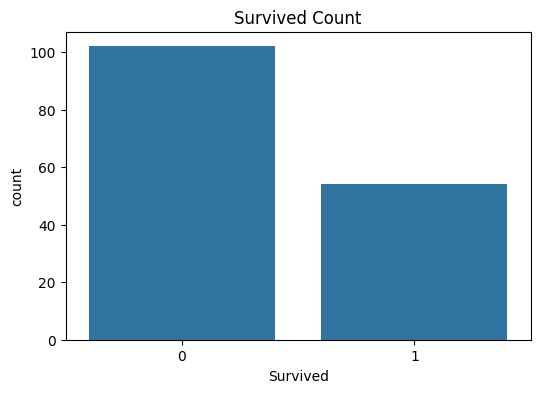

In [9]:
# 에러 원인: 주피터 노트북 셀에서 쉘 명령어(pip)를 직접 입력하면 파이썬 문법으로 인식되어 SyntaxError가 발생합니다.
# 해결 방법: 명령어 앞에 '!' 또는 '%' 기호를 붙여 시스템 쉘에서 실행되도록 명시해야 합니다.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survived Count")
plt.show()


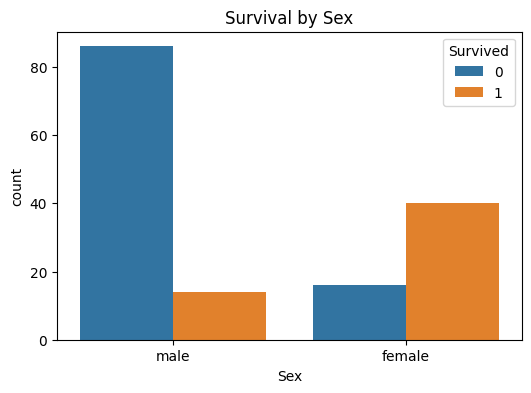

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()


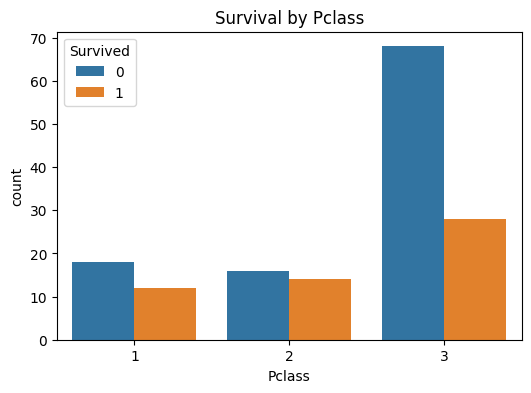

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Pclass")
plt.show()

In [12]:
df["Survived"].mean()


np.float64(0.34615384615384615)

In [13]:
df.groupby("Sex")["Survived"].mean()
df.groupby("Pclass")["Survived"].mean()


Pclass
1    0.400000
2    0.466667
3    0.291667
Name: Survived, dtype: float64

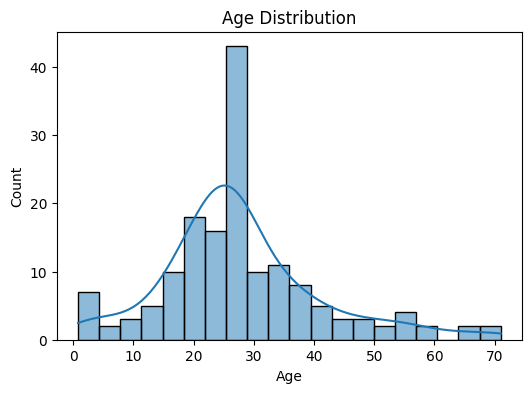

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


In [15]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                        labels=["Child","Teen","Young","Adult","Senior"])
df.groupby("AgeGroup")["Survived"].mean()


C:\Users\gorhk\AppData\Local\Temp\ipykernel_47756\2297707551.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean()


AgeGroup
Child     0.384615
Teen      0.357143
Young     0.387755
Adult     0.222222
Senior    0.000000
Name: Survived, dtype: float64

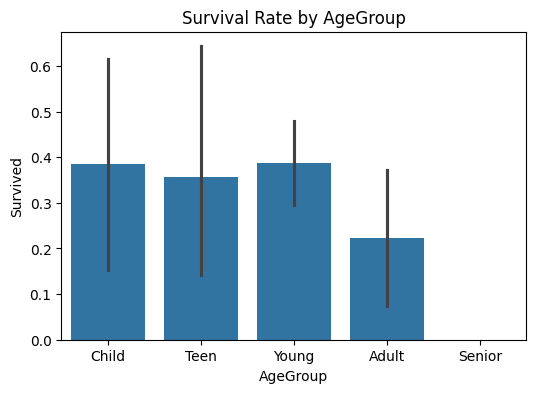

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.title("Survival Rate by AgeGroup")
plt.show()


In [23]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred))


Accuracy: 0.84375
Confusion Matrix:
 [[19  2]
 [ 3  8]]

Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.80      0.73      0.76        11

    accuracy                           0.84        32
   macro avg       0.83      0.82      0.82        32
weighted avg       0.84      0.84      0.84        32



In [21]:
import pandas as pd

new_passenger = {
    "Pclass": 3,
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,        # 남성
    "Embarked_Q": 0,
    "Embarked_S": 1       # S라고 가정
}

new_df = pd.DataFrame([new_passenger])[X.columns]  # 컬럼 순서 맞추기

pred_label = model.predict(new_df)[0]
pred_proba = model.predict_proba(new_df)[0, 1]

pred_label, pred_proba


(np.int64(0), np.float64(0.12179299387239619))

In [22]:
import pandas as pd

new_passenger = {
    "Pclass": 1,
    "Age": 18,
    "SibSp": 0,
    "Parch": 0,
    "Fare": 200,
    "Sex_male": 0,        # 여성
    "Embarked_Q": 0,
    "Embarked_S": 1       # S라고 가정
}

new_df = pd.DataFrame([new_passenger])[X.columns]  # 컬럼 순서 맞추기

pred_label = model.predict(new_df)[0]
pred_proba = model.predict_proba(new_df)[0, 1]

pred_label, pred_proba


(np.int64(1), np.float64(0.6575435813530628))